In [17]:
# Import dependencies
import pandas as pd
import numpy as np
from path import Path
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings

In [18]:
df = pd.read_csv('data/crime.csv')
df.head()

,ID,Primary_Type,Violence_Status,Description,Location_Description,Arrest,Community_Area,Latitude,Longitude,Date,Time,Average_Wind_Speed,Average_Temperature,Fog_Ice_Freezing_Fog,Thunder,Smoke_or_Haze,Community_Name
0,11698035,ASSAULT,VIOLENT,SIMPLE,APARTMENT,f,44,41.747196,-87.602638,1/1/19,8:00:00,7.61,31,1.0,NaN,NaN,Chatham
1,11884966,OFFENSE INVOLVING CHILDREN,NON-VIOLENT,CHILD PORNOGRAPHY,RESIDENCE,f,55,41.683664,-87.532842,1/1/19,0:01:00,7.61,31,1.0,NaN,NaN,Hegewisch
2,11878985,THEFT,NON-VIOLENT,OVER $500,OTHER,f,18,41.923613,-87.793512,1/1/19,0:00:00,7.61,31,1.0,NaN,NaN,Montclare
3,11682859,OFFENSE INVOLVING CHILDREN,NON-VIOLENT,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,f,69,41.759333,-87.633307,1/1/19,0:00:00,7.61,31,1.0,NaN,NaN,Greater Grand Crossing
4,11739161,OFFENSE INVOLVING CHILDREN,NON-VIOLENT,AGG CRIM SEX ABUSE FAM MEMBER,APARTMENT,f,54,41.656345,-87.605130,1/1/19,0:00:00,7.61,31,1.0,NaN,NaN,Riverdale


In [19]:
# Set up dataframe with only the features we are pridicting
df = df[['Date', 'Violence_Status', 'Community_Area', 'Average_Wind_Speed', 'Average_Temperature', 'Fog_Ice_Freezing_Fog',
         'Smoke_or_Haze']]
df = df.replace(np.nan,0)
df.head()

,Date,Violence_Status,Community_Area,Average_Wind_Speed,Average_Temperature,Fog_Ice_Freezing_Fog,Smoke_or_Haze
0,1/1/19,VIOLENT,44,7.61,31,1.0,0.0
1,1/1/19,NON-VIOLENT,55,7.61,31,1.0,0.0
2,1/1/19,NON-VIOLENT,18,7.61,31,1.0,0.0
3,1/1/19,NON-VIOLENT,69,7.61,31,1.0,0.0
4,1/1/19,NON-VIOLENT,54,7.61,31,1.0,0.0


In [20]:
# correct column format

# df['DailyWeather'] = df['DailyWeather'].astype(str)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668177 entries, 0 to 668176
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  668177 non-null  object 
 1   Violence_Status       668177 non-null  object 
 2   Community_Area        668177 non-null  int64  
 3   Average_Wind_Speed    668177 non-null  float64
 4   Average_Temperature   668177 non-null  int64  
 5   Fog_Ice_Freezing_Fog  668177 non-null  float64
 6   Smoke_or_Haze         668177 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 35.7+ MB
None


In [21]:
# correct date format

df['Date'] = pd.to_datetime(df['Date']).dt.date

In [22]:
# correct date format

df['Date'] =  pd.to_datetime(df['Date'], format="%Y-%m-%d")

In [23]:
# correct date format

df['Day of year'] =  pd.to_datetime(df['Date'], format="%m-%d")

In [24]:
df.head()

,Date,Violence_Status,Community_Area,Average_Wind_Speed,Average_Temperature,Fog_Ice_Freezing_Fog,Smoke_or_Haze,Day of year
0,2019-01-01,VIOLENT,44,7.61,31,1.0,0.0,2019-01-01
1,2019-01-01,NON-VIOLENT,55,7.61,31,1.0,0.0,2019-01-01
2,2019-01-01,NON-VIOLENT,18,7.61,31,1.0,0.0,2019-01-01
3,2019-01-01,NON-VIOLENT,69,7.61,31,1.0,0.0,2019-01-01
4,2019-01-01,NON-VIOLENT,54,7.61,31,1.0,0.0,2019-01-01


In [25]:
def wrangle(X):
    X = X.copy()

    # Create 'year' feature
    X['Year'] = X['Date'].dt.year

    # Create 'month' feature
    X['Month'] = X['Date'].dt.month

    # Create 'day' feature
    X['Day'] = X['Date'].dt.day

    # Create 'day of week' feature
    X['Weekday'] = X['Date'].dt.weekday
    return X
df=wrangle(df)

In [27]:
crimes_per_day=df.groupby(["Date"]).size().reset_index(name="Crimes_per_day")
crimes_per_day

,Date,Crimes_per_day
0,2019-01-01,1005
1,2019-01-02,645
2,2019-01-03,748
3,2019-01-04,759
4,2019-01-05,789
...,...,...
1091,2021-12-27,446
1092,2021-12-28,403
1093,2021-12-29,451
1094,2021-12-30,482


In [30]:
df = crimes_per_day.merge(df,on='Date')

In [32]:
df = df[['Crimes_per_day', 'Community_Area', 'Average_Wind_Speed', 'Average_Temperature', 'Fog_Ice_Freezing_Fog',
         'Smoke_or_Haze', 'Year', 'Month', 'Day', 'Weekday']]
df = df.replace(np.nan,0)
df.head()

,Crimes_per_day,Community_Area,Average_Wind_Speed,Average_Temperature,Fog_Ice_Freezing_Fog,Smoke_or_Haze,Year,Month,Day,Weekday
0,1005,44,7.61,31,1.0,0.0,2019,1,1,1
1,1005,55,7.61,31,1.0,0.0,2019,1,1,1
2,1005,18,7.61,31,1.0,0.0,2019,1,1,1
3,1005,69,7.61,31,1.0,0.0,2019,1,1,1
4,1005,54,7.61,31,1.0,0.0,2019,1,1,1


In [36]:
df.dtypes

Crimes_per_day            int64
Community_Area            int64
Average_Wind_Speed      float64
Average_Temperature       int64
Fog_Ice_Freezing_Fog    float64
Smoke_or_Haze           float64
Year                      int64
Month                     int64
Day                       int64
Weekday                   int64
dtype: object

In [41]:
# split data for training and testing
X = df
X = pd.get_dummies(X)

y = df
y = pd.get_dummies(Y)
#Split the data into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42)

X_train.shape

(501132, 10)

In [44]:
target='Crimes_per_day'

#create dataframes for model

X_train 

,Crimes_per_day,Community_Area,Average_Wind_Speed,Average_Temperature,Fog_Ice_Freezing_Fog,Smoke_or_Haze,Year,Month,Day,Weekday
449977,523,46,8.28,29,0.0,0.0,2020,12,1,1
229540,674,29,5.14,37,1.0,0.0,2019,11,18,0
410097,551,52,6.26,64,0.0,1.0,2020,9,21,0
99445,743,26,9.40,65,1.0,0.0,2019,5,28,1
46240,671,25,20.36,55,1.0,0.0,2019,3,14,3
...,...,...,...,...,...,...,...,...,...,...
644167,575,1,8.95,38,1.0,1.0,2021,11,16,1
259178,627,43,11.63,42,0.0,0.0,2020,1,2,3
365838,623,57,8.05,78,0.0,0.0,2020,7,11,5
131932,824,73,6.71,71,0.0,0.0,2019,7,8,0


In [46]:

features=[
 'Community_Area',
 'Average_Temperature',
 'Month',
 'Day',
 'Weekday',
]

In [48]:
X_train = X_train[features]
y_train = y_train[target]
X_test = X_test[features]
y_test = y_test[target]

In [50]:
X_train

,Community_Area,Average_Temperature,Month,Day,Weekday
449977,46,29,12,1,1
229540,29,37,11,18,0
410097,52,64,9,21,0
99445,26,65,5,28,1
46240,25,55,3,14,3
...,...,...,...,...,...
644167,1,38,11,16,1
259178,43,42,1,2,3
365838,57,78,7,11,5
131932,73,71,7,8,0


In [51]:
y_test

561274    659
468024    533
83118     783
13524     488
28340     734
         ... 
402122    594
308152    372
50173     683
27208     655
470781    548
Name: Crimes_per_day, Length: 167045, dtype: int64

In [53]:
guess = df['Crimes_per_day'].mean()
errors = guess - df['Crimes_per_day']
mean_absolute_error = errors.abs().mean()
print(f'If we just guessed every community had {guess:}, crimes per day')
print(f'we would be off by {mean_absolute_error:} crimes on average.')

If we just guessed every community had 630.9038338643802, crimes per day
we would be off by 89.26093000317402 crimes on average.


In [54]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 96.55 %.


In [57]:
X = X_train
y = y_train

In [58]:
from sklearn.pipeline import make_pipeline
from sklearn import datasets, svm
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [59]:
# create random forest regressor pipeline


pipeline = make_pipeline(
    RandomForestRegressor(n_estimators = 100,
                          max_depth = 15,
                          random_state = 42, n_jobs=-1)
)
pipeline.fit(X,y)

Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(max_depth=15, n_jobs=-1,
                                       random_state=42))])

In [60]:
# create predict function for testing and deployment

def predict (Community_Area,
             Average_Temperature,
             Month,
             Day,
             Weekday):
    df9=pd.DataFrame(
        columns = ['Community_Area',
                   'Average_Temperature',
                   'Month',
                   'Day',
                   'Weekday'],
                    data =[[Community_Area,
                            Average_Temperature,
                            Month,
                            Day,
                            Weekday]]
    )
    df9pred = pipeline.predict(df9)[0]
    return f'{df9pred:.0f}'

In [61]:
# Use the forest's predict method on the test data
predictions = pipeline.predict(X)
# Calculate the absolute errors
errors = abs(predictions - y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 5), 'crimes.')

Mean Absolute Error: 11.02949 crimes.


In [62]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 5), '%.')

Accuracy: 98.22211 %.


In [63]:
errors.describe()

count    501132.000000
mean         11.029488
std          23.252185
min           0.000000
25%           0.000000
50%           0.156200
75%           9.383125
max         149.467882
Name: Crimes_per_day, dtype: float64

In [65]:
# test model for deployment

predict (1,14,3,0,0)

'521'

In [66]:
# export model for deployment

from joblib import dump
dump(pipeline, 'pipeline2.joblib', compress=True)

['pipeline2.joblib']

In [139]:
# correct column format

# df['DailyWeather'] = df['DailyWeather'].astype(str)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668177 entries, 0 to 668176
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Violence_Status       668177 non-null  object 
 1   Community_Area        668177 non-null  int64  
 2   Average_Wind_Speed    668177 non-null  float64
 3   Average_Temperature   668177 non-null  int64  
 4   Fog_Ice_Freezing_Fog  668177 non-null  float64
 5   Smoke_or_Haze         668177 non-null  float64
 6   Year                  668177 non-null  int64  
 7   Month                 668177 non-null  int64  
 8   Day                   668177 non-null  int64  
 9   Weekday               668177 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 51.0+ MB
None


In [140]:
# Create our features
X = df.drop(columns='Violence_Status')
X = pd.get_dummies(X)
# Create our target
y = df2['Violence_Status']

In [141]:
print(X.shape)
print(y.shape)
X.head()

(668177, 9)
(668177,)


,Community_Area,Average_Wind_Speed,Average_Temperature,Fog_Ice_Freezing_Fog,Smoke_or_Haze,Year,Month,Day,Weekday
0,44,7.61,31,1.0,0.0,2019,1,1,1
1,55,7.61,31,1.0,0.0,2019,1,1,1
2,18,7.61,31,1.0,0.0,2019,1,1,1
3,69,7.61,31,1.0,0.0,2019,1,1,1
4,54,7.61,31,1.0,0.0,2019,1,1,1


In [142]:
#Split the data into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42)

X_train.shape


(501132, 9)

In [143]:
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)
# Scaling data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [144]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

In [145]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [146]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [147]:
predictions

array(['NON-VIOLENT', 'NON-VIOLENT', 'NON-VIOLENT', ..., 'NON-VIOLENT',
       'NON-VIOLENT', 'NON-VIOLENT'], dtype=object)

In [148]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Non-voilent", "Actual Violent"], columns=["Predicted Non-violent", "Predicted Violent"])

cm_df

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [149]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted Non-violent,Predicted Violent
Actual Non-voilent,93375,18714
Actual Violent,43786,11170


Accuracy Score : 0.6258493220389716
Classification Report
              precision    recall  f1-score   support

 NON-VIOLENT       0.68      0.83      0.75    112089
     VIOLENT       0.37      0.20      0.26     54956

    accuracy                           0.63    167045
   macro avg       0.53      0.52      0.51    167045
weighted avg       0.58      0.63      0.59    167045



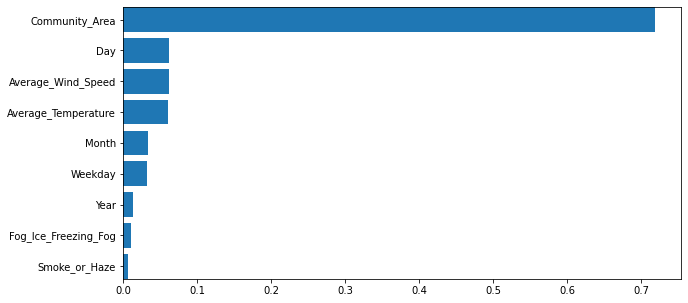

In [150]:
# Displaying the feature importances
feature_importances = rf_model.feature_importances_
%matplotlib inline
from matplotlib import pyplot as plt
features = sorted(zip(X.columns, rf_model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,5)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [151]:
# Test prediction 
rf_model.predict([[1, 0, 80, 0, 0, 4, 21, 3, 0]])

array(['NON-VIOLENT'], dtype=object)

In [169]:
from sklearn.pipeline import make_pipeline
from sklearn import datasets, svm
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [ ]:
# convert string to integer

df['Community_Area'] = df['Community_Area'].apply(np.int64)

In [ ]:
# def wrangle(X):
#     X = X.copy()

#     # Create 'year' feature
#     X['Year'] = X['DATE'].dt.year

#     # Create 'month' feature
#     X['Month'] = X['DATE'].dt.month

#     # Create 'day' feature
#     X['Day'] = X['DATE'].dt.day

#     # Create 'day of week' feature
#     X['Weekday'] = X['DATE'].dt.weekday
#     return X
# train=wrangle(df)
# train.head()

In [ ]:
df.head()

In [171]:
df = df[['Year', 'Month', 'Day', 'Weekday', 'Community_Area', 'Average_Wind_Speed', 'Average_Temperature', 'Fog_Ice_Freezing_Fog',
         'Smoke_or_Haze']]
df.head()

,Year,Month,Day,Weekday,Community_Area,Average_Wind_Speed,Average_Temperature,Fog_Ice_Freezing_Fog,Smoke_or_Haze
0,2019,1,1,1,44,7.61,31,1.0,0.0
1,2019,1,1,1,55,7.61,31,1.0,0.0
2,2019,1,1,1,18,7.61,31,1.0,0.0
3,2019,1,1,1,69,7.61,31,1.0,0.0
4,2019,1,1,1,54,7.61,31,1.0,0.0


In [170]:
# create random forest class pipeline


# pipeline = make_pipeline(
#     RandomForestClassifier(n_estimators = 100,
#                           max_depth = 15,
#                           random_state = 42, n_jobs=-1)
# )
# pipeline.fit(X,y)

pipeline = Pipeline([('feature_selection', SelectKBest(chi2, k=2)), ('classification', RandomForestClassifier()) ])
print(type(pipeline))

NameError: name 'SelectKBest' is not defined

In [67]:
# create predict function for testing and deployment

def predict (Community_Area,
             Average_Temperature,
             Month,
             Day,
             Weekday):
    df9=pd.DataFrame(
        columns = ['Community_Area',
                   'Average_Temperature',
                   'Month',
                   'Day',
                   'Weekday'],
                    data =[[Community_Area,
                            Average_Temperature,
                            Month,
                            Day,
                            Weekday]]
    )
    df9pred = pipeline.predict(df9)[0]
    return f'{df9pred:.0f}'

In [68]:
# # Use the forest's predict method on the test data
# predictions = pipeline.predict(X)
# # Calculate the absolute errors
# errors = abs(predictions - y)
# # Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 5), 'crimes.')

In [69]:
# export model for deployment

from joblib import dump
dump(pipeline, 'pipeline3.joblib', compress=True)

['pipeline3.joblib']

In [71]:
# Use the forest's predict method on the test data
predictions = pipeline.predict(X)
# Calculate the absolute errors
errors = abs(predictions - y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 5), 'crimes.')

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [72]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 5), '%.')

NameError: name 'errors' is not defined